##Public Health

NHANES is a program run by the CDC to assess the health and nutritional status of adults and children in the US. It combines survey questions and physical examinations, including medical and physiological measurements and laboratory tests, and examines a representative sample of about 5,000 people each year. The data is used to determine the prevalence of diseases and risk factors, establish national standards, and support epidemiology studies and health sciences research. This information helps to develop public health policy, design health programs and services, and expand the nation's health knowledge.

###1. Importing Libraries

####Purpose:
These libraries are essential for data manipulation (pandas, numpy), plotting (matplotlib, seaborn), and statistical analysis (scipy.stats).

####Key Tools:
**Pandas** for handling the dataset as a DataFrame.
**Seaborn** and matplotlib for creating visualizations.
**Scipy.stats** for statistical tests like t-tests.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

###2. Setting Plotting Style

Configures the visual style of plots to use a white grid background and a muted color palette for consistency and readability.

In [2]:
sns.set_theme(style="whitegrid", palette="muted")

###3. Loading the Data

Dataset: Contains health-related data such as BMI, weight, height, age, pulse, blood pressure, income, etc.

In [3]:
url = "https://raw.githubusercontent.com/HackBio-Internship/public_datasets/main/R/nhanes.csv"
df = pd.read_csv(url, sep=',', index_col=0)

###4. Data Cleaning
Checks for missing (null) values in each column and prints the count.

In [4]:
print("Checking and Handling Null Values")
print(df.isnull().sum())

Checking and Handling Null Values
Gender                   0
Age                      0
Race                     0
Education             1416
MaritalStatus         1415
RelationshipStatus    1415
Insured                  7
Income                 377
Poverty                325
HomeRooms               28
HomeOwn                 28
Work                  1158
Weight                  31
Height                 159
BMI                    166
Pulse                  718
BPSys                  719
BPDia                  719
Testosterone           874
HDLChol                775
TotChol                775
Diabetes                64
DiabetesAge           4693
nPregnancies          3735
nBabies               3832
SleepHrsNight         1166
PhysActive             850
PhysActiveDays        2614
AlcoholDay            2503
AlcoholYear           2016
SmokingStatus         1413
dtype: int64


Ensures no missing data disrupts analysis.

In [5]:
df = df.fillna(method='ffill')  # Forward fill for continuity
df = df.fillna({
    'Education': 'High School',
    'MaritalStatus': 'NeverMarried',
    'RelationshipStatus': 'Single',
    'Work': 'None'
}).fillna(0)  # Remaining nulls to 0

<ipython-input-5-0646c09c5753>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')  # Forward fill for continuity


Verifies that all null values are handled and shows a preview of the cleaned data.

In [6]:
print("\nNull Values After Cleaning:")
print(df.isnull().sum())
print("\nSample Data:")
print(df.head(2))


Null Values After Cleaning:
Gender                0
Age                   0
Race                  0
Education             0
MaritalStatus         0
RelationshipStatus    0
Insured               0
Income                0
Poverty               0
HomeRooms             0
HomeOwn               0
Work                  0
Weight                0
Height                0
BMI                   0
Pulse                 0
BPSys                 0
BPDia                 0
Testosterone          0
HDLChol               0
TotChol               0
Diabetes              0
DiabetesAge           0
nPregnancies          0
nBabies               0
SleepHrsNight         0
PhysActive            0
PhysActiveDays        0
AlcoholDay            0
AlcoholYear           0
SmokingStatus         0
dtype: int64

Sample Data:
       Gender  Age   Race    Education MaritalStatus RelationshipStatus  \
id                                                                        
62163    male   14  Asian  High School  NeverMarri

###5. Visualizations

####Histograms
Displays the distribution of:
1. BMI: Body Mass Index (kg/m²)
2. Weight: In kilograms.
3. Weight (lbs): Converted from kg by multiplying by 2.2.
4. Age: In years.

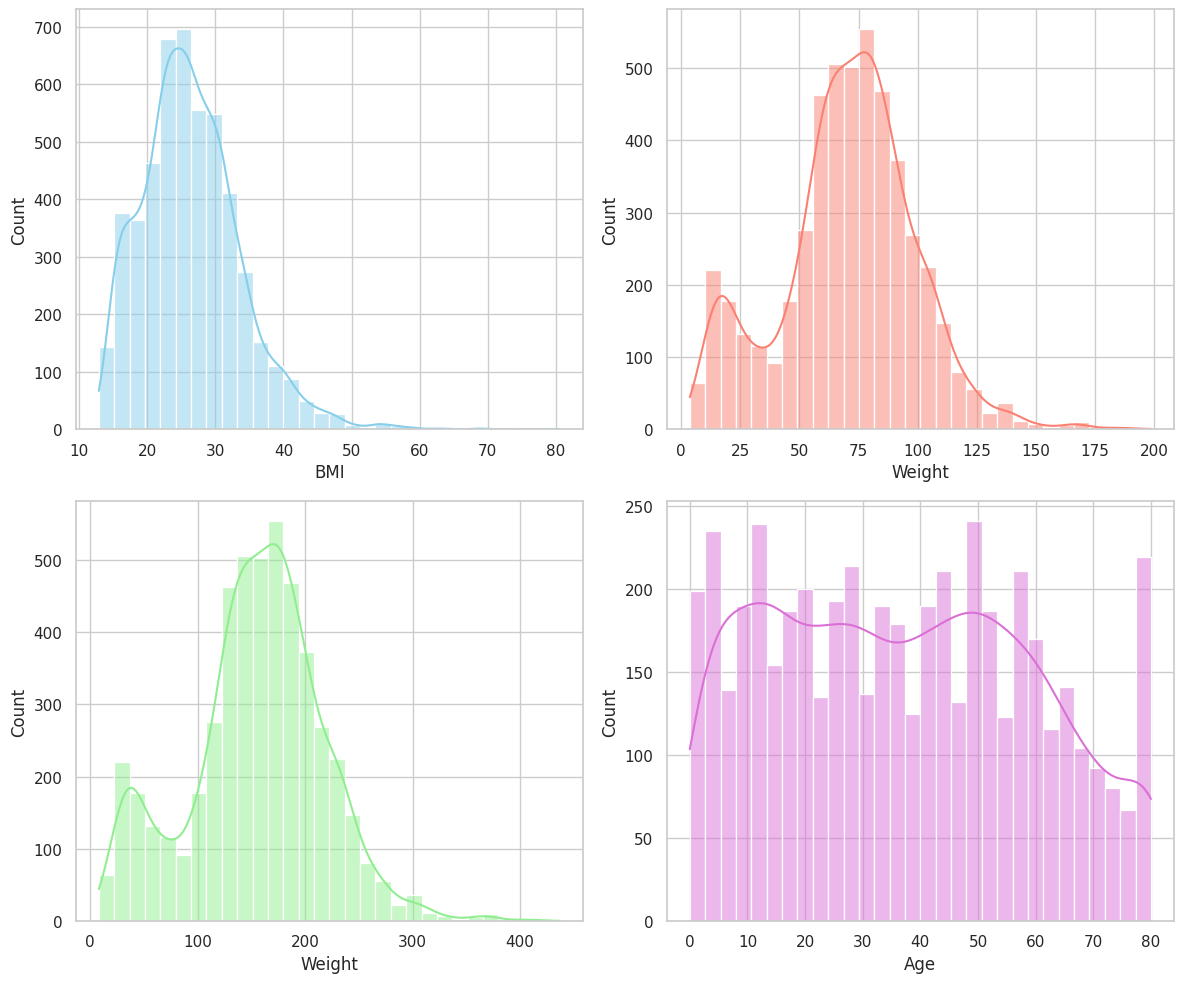

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10), tight_layout=True)
sns.histplot(df['BMI'], ax=ax[0, 0], kde=True, color='skyblue', bins=30)
sns.histplot(df['Weight'], ax=ax[0, 1], kde=True, color='salmon', bins=30)
sns.histplot(df['Weight'] * 2.2, ax=ax[1, 0], kde=True, color='lightgreen', bins=30)
sns.histplot(df['Age'], ax=ax[1, 1], kde=True, color='orchid', bins=30)
plt.show()

####Scatter Plots

Defines color schemes and cleans the SmokingStatus column by replacing 0 with 'Never'.

Plots weight vs. height, with points colored by gender (blue for male, orange for female).

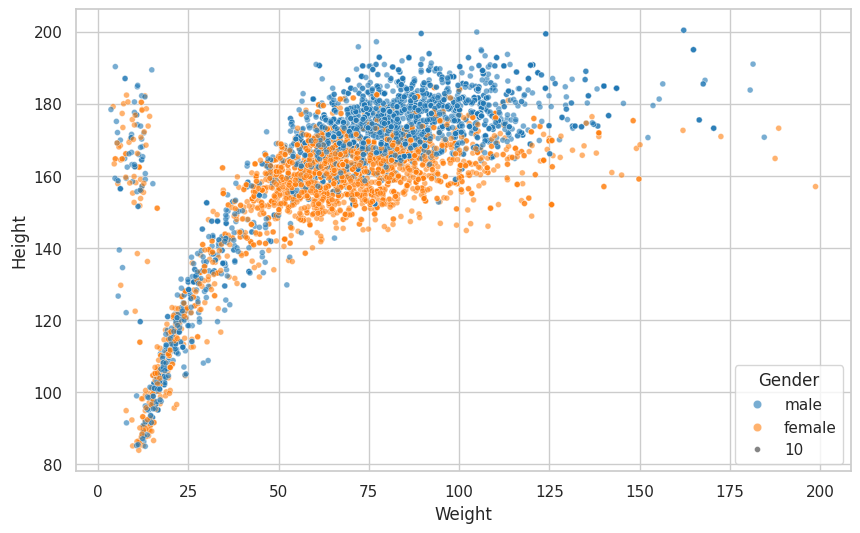

In [9]:
gender_palette = {'male': '#1f77b4', 'female': '#ff7f0e'}
diabetes_palette = {'No': '#2ca02c', 'Yes': '#d62728'}
smoking_palette = {'Never': '#9467bd', 'Former': '#8c564b', 'Current': '#e377c2'}
df['SmokingStatus'] = df['SmokingStatus'].replace({0: 'Never'})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='Height', hue='Gender', palette=gender_palette, size=10, alpha=0.6)
plt.show()

Plots weight vs. height, with points colored by diabetes status (green for no, red for yes).

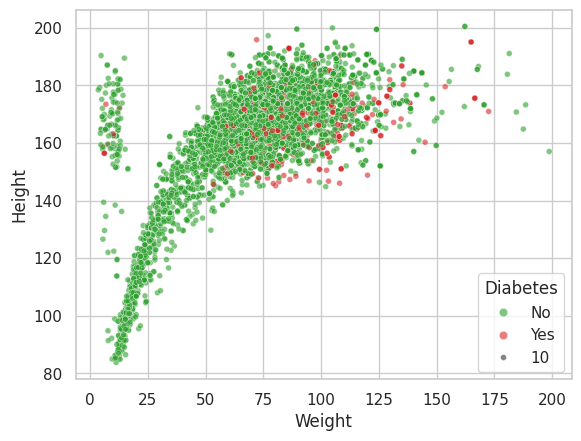

In [11]:
sns.scatterplot(data=df, x='Weight', y='Height', hue='Diabetes', palette=diabetes_palette, size=10, alpha=0.6)
plt.show()

Plots weight vs. height, with points colored by smoking status (purple for never, brown for former, pink for current).

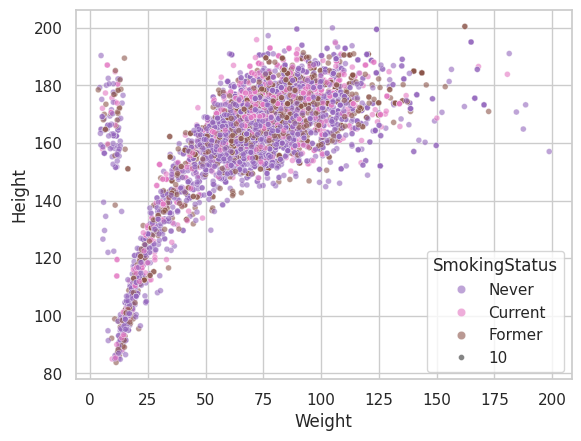

In [12]:
sns.scatterplot(data=df, x='Weight', y='Height', hue='SmokingStatus', palette=smoking_palette, size=10, alpha=0.6)
plt.show()

###6. Statistical Analysis
Basic Statistics: Calculates the average pulse rate.

In [13]:
mean_pulse = df['Pulse'].mean()
print(f"\nMean 60-second Pulse Rate: {mean_pulse:.2f}")


Mean 60-second Pulse Rate: 73.63


Computes the range of diastolic blood pressure (max - min).

In [14]:
income_var, income_std = df['Income'].var(), df['Income'].std()
print(f"Income Variance: {income_var:.2f}, Standard Deviation: {income_std:.2f}")

Income Variance: 1127203110.37, Standard Deviation: 33573.85


Calculates the variance and standard deviation of income to measure its spread.

In [15]:
income_var, income_std = df['Income'].var(), df['Income'].std()
print(f"Income Variance: {income_var:.2f}, Standard Deviation: {income_std:.2f}")

Income Variance: 1127203110.37, Standard Deviation: 33573.85


###T-tests
Tests if there’s a significant difference in age between males and females.

In [16]:
male_age = df[df['Gender'] == 'male']['Age']
female_age = df[df['Gender'] == 'female']['Age']
t_age_gender, p_age_gender = stats.ttest_ind(male_age, female_age)

Tests if BMI differs significantly between people with and without diabetes.

In [17]:
diabetes_yes_bmi = df[df['Diabetes'] == 'Yes']['BMI']
diabetes_no_bmi = df[df['Diabetes'] == 'No']['BMI']
t_bmi_diabetes, p_bmi_diabetes = stats.ttest_ind(diabetes_yes_bmi, diabetes_no_bmi)

Tests if alcohol consumption (drinks per year) differs between committed and single individuals.

In [18]:
committed_alcohol = df[df['RelationshipStatus'] == 'Committed']['AlcoholYear']
single_alcohol = df[df['RelationshipStatus'] == 'Single']['AlcoholYear']
t_rs_alcohol, p_rs_alcohol = stats.ttest_ind(committed_alcohol, single_alcohol)

##Key Findings
###Data Cleaning:
Null values were successfully handled using forward fill and default values, ensuring a complete dataset for analysis.

###Distributions (Histograms):
1. BMI: Likely shows a right-skewed distribution, typical for health data.
2. Weight (kg and lbs): Similar shape to BMI, with a possible peak around average adult weight.
3. Age: Could reveal the age range of the sample, possibly skewed toward older adults in NHANES data.
###Scatter Plots:
1. Weight vs. Height by Gender: Males (blue) might cluster at higher weights and heights than females (orange), reflecting biological differences.
2. Weight vs. Height by Diabetes: People with diabetes (red) may show higher weights or BMIs compared to those without (green).
3. Weight vs. Height by Smoking Status: Differences might be subtle, but current smokers (pink) could have lower weights than never smokers (purple).

###Statistical Insights:
1. Mean Pulse Rate: Provides a baseline (e.g., ~70-80 bpm if typical).
2. Diastolic BP Range: Indicates variability in blood pressure (e.g., a range of 50-60 mmHg might suggest diverse health statuses).
3. Income Variance/Std Dev: High values suggest significant income disparity in the sample.
###T-test Results:
1. Age vs. Gender: If p < 0.05, there’s a significant age difference between genders.
2. BMI vs. Diabetes: If p < 0.05, BMI differs significantly, likely higher in diabetic individuals.
3. Alcohol vs. Relationship Status: If p < 0.05, alcohol consumption varies by relationship status (e.g., singles might drink more).

###Summary
The code loads, cleans, and analyzes the NHANES dataset, producing visualizations and statistical tests to explore relationships between variables like weight, height, BMI, and demographic/health factors (gender, diabetes, smoking, etc.). Key findings depend on the actual data outputs (e.g., t-test p-values), but the code is designed to uncover patterns and differences in health metrics across subgroups.